## 1. 초과수익률 

### 1-1 삼성전자 최근 1년 (무위험수익률 2%, 시장수익률 8%)

In [ ]:
# 삼성전자(005930)의 최근 1년 주가 데이터
# 초과수익률을 무위험수익률 2%, 시장수익률 8%를 기준으로 계산

C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\pykrx\__init__.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


▶ 삼성전자 최근 1년 연간 수익률: -26.77%
▶ 무위험 수익률 기준 초과수익률: -28.77%
▶ 시장 수익률 기준 초과수익률: -34.77%


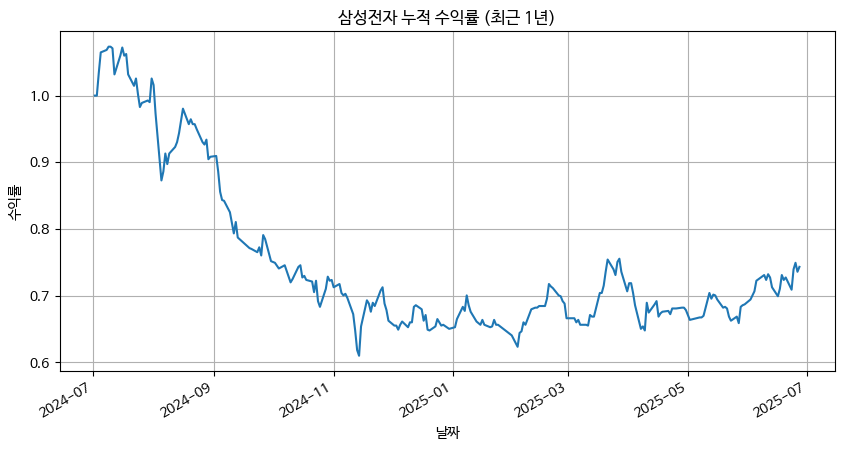

In [1]:
import pandas as pd
from datetime import datetime, timedelta
from pykrx import stock
import matplotlib.pyplot as plt

# 1. 날짜 설정
end_date = datetime.today()
start_date = end_date - timedelta(days=365)
start_str = start_date.strftime('%Y%m%d')
end_str = end_date.strftime('%Y%m%d')

# 2. 삼성전자 일별 종가 가져오기
df = stock.get_market_ohlcv_by_date(start_str, end_str, "005930")  # 삼성전자
df = df[['종가']]
df = df.rename(columns={'종가': 'Close'})
df.index = pd.to_datetime(df.index)

# 3. 일간 수익률 계산
df['Return'] = df['Close'].pct_change()

# 4. 연간 수익률 계산 (단순 수익률 방식)
cumulative_return = (df['Return'] + 1).prod() - 1
annual_return = (1 + cumulative_return) ** (252 / len(df)) - 1  # 연율화

# 5. 초과수익률 계산
risk_free_rate = 0.02
market_return = 0.08

excess_return_risk_free = annual_return - risk_free_rate
excess_return_market = annual_return - market_return

# 6. 출력
print(f"▶ 삼성전자 최근 1년 연간 수익률: {annual_return:.2%}")
print(f"▶ 무위험 수익률 기준 초과수익률: {excess_return_risk_free:.2%}")
print(f"▶ 시장 수익률 기준 초과수익률: {excess_return_market:.2%}")

# 7. 시각화
df['Cumulative Return'] = (1 + df['Return']).cumprod()
df['Cumulative Return'].plot(title='삼성전자 누적 수익률 (최근 1년)', figsize=(10, 5))
plt.ylabel('수익률')
plt.grid(True)
plt.show()


### 1-2 삼성전자 vs KOSPI 수익률 기반 초과수익률 계산

▶ 삼성전자 연환산 수익률: -26.77%
▶ KOSPI 연환산 수익률: 9.44%
▶ 무위험수익률(2%) 기준 초과수익률: -28.77%
▶ KOSPI 시장 수익률 기준 초과수익률: -36.21%


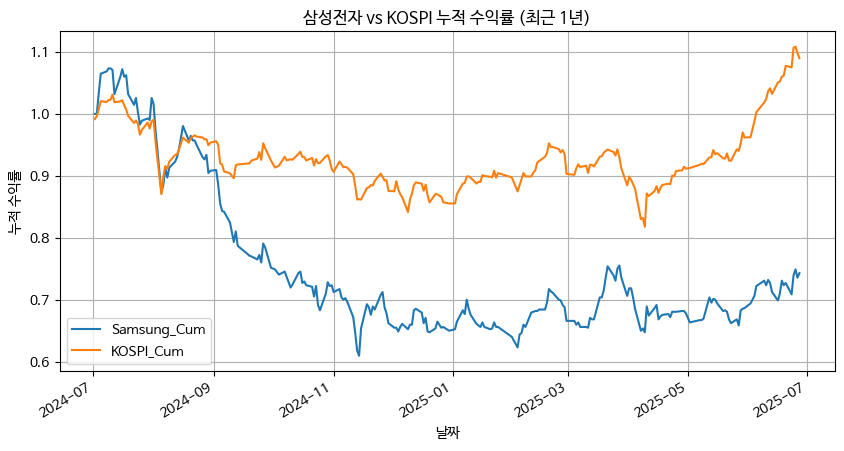

In [2]:
import pandas as pd
from datetime import datetime, timedelta
from pykrx import stock
import matplotlib.pyplot as plt

# 1. 날짜 설정 (최근 1년)
end_date = datetime.today()
start_date = end_date - timedelta(days=365)
start_str = start_date.strftime('%Y%m%d')
end_str = end_date.strftime('%Y%m%d')

# 2. 삼성전자 일별 종가
df_samsung = stock.get_market_ohlcv_by_date(start_str, end_str, "005930")
df_samsung = df_samsung[['종가']].rename(columns={'종가': 'Samsung_Close'})
df_samsung.index = pd.to_datetime(df_samsung.index)

# 3. KOSPI 지수 일별 종가
df_kospi = stock.get_index_ohlcv_by_date(start_str, end_str, "1001")  # KOSPI 코드
df_kospi = df_kospi[['종가']].rename(columns={'종가': 'KOSPI_Close'})
df_kospi.index = pd.to_datetime(df_kospi.index)

# 4. 데이터 정렬 및 병합
df = pd.merge(df_samsung, df_kospi, left_index=True, right_index=True)

# 5. 수익률 계산
df['Samsung_Return'] = df['Samsung_Close'].pct_change()
df['KOSPI_Return'] = df['KOSPI_Close'].pct_change()

# 6. 연간 수익률 계산
samsung_cum_return = (1 + df['Samsung_Return']).prod() - 1
kospi_cum_return = (1 + df['KOSPI_Return']).prod() - 1

samsung_annual = (1 + samsung_cum_return) ** (252 / len(df)) - 1
kospi_annual = (1 + kospi_cum_return) ** (252 / len(df)) - 1

# 7. 초과수익률 계산
risk_free_rate = 0.02
excess_return_rf = samsung_annual - risk_free_rate
excess_return_market = samsung_annual - kospi_annual

# 8. 결과 출력
print(f"▶ 삼성전자 연환산 수익률: {samsung_annual:.2%}")
print(f"▶ KOSPI 연환산 수익률: {kospi_annual:.2%}")
print(f"▶ 무위험수익률(2%) 기준 초과수익률: {excess_return_rf:.2%}")
print(f"▶ KOSPI 시장 수익률 기준 초과수익률: {excess_return_market:.2%}")

# 9. 누적 수익률 시각화
df['Samsung_Cum'] = (1 + df['Samsung_Return']).cumprod()
df['KOSPI_Cum'] = (1 + df['KOSPI_Return']).cumprod()

df[['Samsung_Cum', 'KOSPI_Cum']].plot(figsize=(10, 5), title='삼성전자 vs KOSPI 누적 수익률 (최근 1년)')
plt.ylabel('누적 수익률')
plt.grid(True)
plt.show()


### 1-3. 로그수익률, 샤프비율

▶ 삼성전자 연환산 로그수익률: -31.28%
▶ KOSPI 연환산 로그수익률: 9.06%
▶ 삼성전자 샤프 비율: -0.983
▶ KOSPI 샤프 비율: 0.319


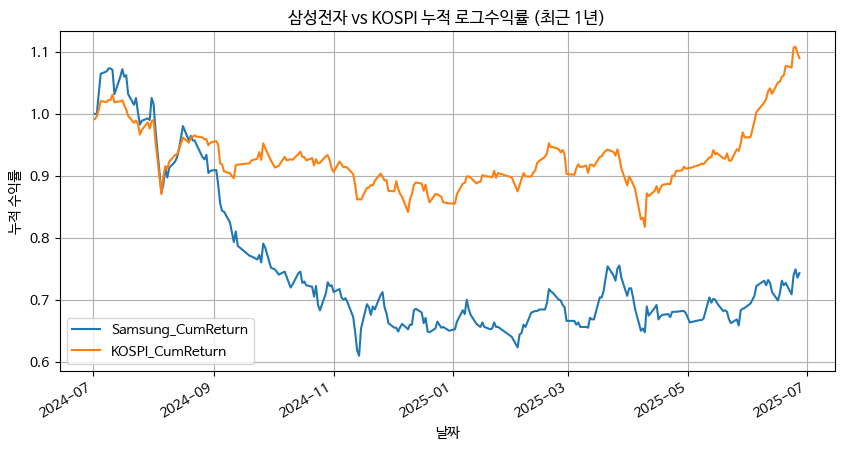

In [3]:
import pandas as pd
from datetime import datetime, timedelta
from pykrx import stock
import matplotlib.pyplot as plt
import numpy as np

# 1. 날짜 설정
end_date = datetime.today()
start_date = end_date - timedelta(days=365)
start_str = start_date.strftime('%Y%m%d')
end_str = end_date.strftime('%Y%m%d')

# 2. 종가 데이터 수집
df_samsung = stock.get_market_ohlcv_by_date(start_str, end_str, "005930")
df_samsung = df_samsung[['종가']].rename(columns={'종가': 'Samsung_Close'})
df_samsung.index = pd.to_datetime(df_samsung.index)

df_kospi = stock.get_index_ohlcv_by_date(start_str, end_str, "1001")
df_kospi = df_kospi[['종가']].rename(columns={'종가': 'KOSPI_Close'})
df_kospi.index = pd.to_datetime(df_kospi.index)

# 3. 병합
df = pd.merge(df_samsung, df_kospi, left_index=True, right_index=True)

# 4. 로그수익률 계산
df['Samsung_LogReturn'] = np.log(df['Samsung_Close'] / df['Samsung_Close'].shift(1))
df['KOSPI_LogReturn'] = np.log(df['KOSPI_Close'] / df['KOSPI_Close'].shift(1))

# 5. 연환산 로그수익률 및 표준편차 계산
log_mean_samsung = df['Samsung_LogReturn'].mean() * 252
log_std_samsung = df['Samsung_LogReturn'].std() * np.sqrt(252)

log_mean_kospi = df['KOSPI_LogReturn'].mean() * 252
log_std_kospi = df['KOSPI_LogReturn'].std() * np.sqrt(252)

# 6. 무위험수익률 가정
risk_free_rate = 0.02

# 7. 샤프 비율 계산
sharpe_samsung = (log_mean_samsung - risk_free_rate) / log_std_samsung
sharpe_kospi = (log_mean_kospi - risk_free_rate) / log_std_kospi

# 8. 누적 로그수익률 → 누적 수익률로 변환
df['Samsung_CumLogReturn'] = df['Samsung_LogReturn'].cumsum()
df['KOSPI_CumLogReturn'] = df['KOSPI_LogReturn'].cumsum()

df['Samsung_CumReturn'] = np.exp(df['Samsung_CumLogReturn'])
df['KOSPI_CumReturn'] = np.exp(df['KOSPI_CumLogReturn'])

# 9. 출력
print(f"▶ 삼성전자 연환산 로그수익률: {log_mean_samsung:.2%}")
print(f"▶ KOSPI 연환산 로그수익률: {log_mean_kospi:.2%}")
print(f"▶ 삼성전자 샤프 비율: {sharpe_samsung:.3f}")
print(f"▶ KOSPI 샤프 비율: {sharpe_kospi:.3f}")

# 10. 시각화
df[['Samsung_CumReturn', 'KOSPI_CumReturn']].plot(
    figsize=(10, 5),
    title='삼성전자 vs KOSPI 누적 로그수익률 (최근 1년)'
)
plt.ylabel("누적 수익률")
plt.grid(True)
plt.show()


## 2. CAR(Cumulative Abnormal Return, 누적 초과수익률)

In [ ]:
# 예시 시나리오
# 대상 종목: 삼성전자 (005930)

# 시장 지수: KOSPI (1001)

# 무위험 수익률: 연 2% (→ 일간으로 환산)

# 이벤트 날짜: 2024-06-01 (예시)

# 이벤트 윈도우: 이벤트 전후 ±5일

# 추정 윈도우: 이벤트 이전 120거래일

추정된 α (alpha): -0.000784, β (beta): 1.1747

[이벤트 윈도우 수익률 및 CAR]
             R_stock  E_R_stock        AR       CAR
날짜                                                 
2024-05-27  0.017128   0.014685  0.002443  0.002443
2024-05-28  0.005181  -0.000844  0.006026  0.008469
2024-05-29 -0.030928  -0.020436 -0.010492 -0.002023
2024-05-30 -0.022606  -0.019151 -0.003455 -0.005478
2024-05-31  0.000000  -0.000303  0.000303 -0.005175
2024-06-03  0.029932   0.019712  0.010220  0.005045
2024-06-04 -0.005284  -0.009726  0.004442  0.009487
2024-06-05  0.027888   0.011307  0.016581  0.026069


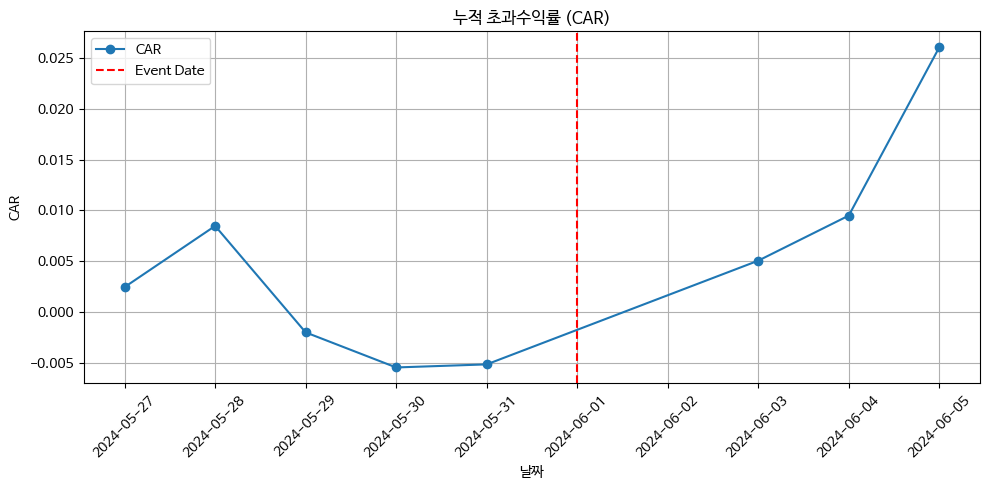

In [4]:
import pandas as pd
import numpy as np
from pykrx import stock
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. 설정
event_date = datetime(2024, 6, 1)
estimation_window = 120
event_window = 5

# 2. 날짜 계산
start_est = event_date - timedelta(days=180)
end_event = event_date + timedelta(days=event_window + 5)

# 3. 데이터 수집
df_stock = stock.get_market_ohlcv_by_date(start_est.strftime('%Y%m%d'), end_event.strftime('%Y%m%d'), "005930")[['종가']]
df_kospi = stock.get_index_ohlcv_by_date(start_est.strftime('%Y%m%d'), end_event.strftime('%Y%m%d'), "1001")[['종가']]
df = pd.merge(df_stock, df_kospi, left_index=True, right_index=True)
df.columns = ['Stock', 'Market']

# 4. 일간 수익률
df['R_stock'] = df['Stock'].pct_change()
df['R_market'] = df['Market'].pct_change()
df = df.dropna()

# 5. 추정 윈도우 구간
est_start = event_date - timedelta(days=estimation_window + event_window)
est_end = event_date - timedelta(days=1)
df_est = df[(df.index >= est_start) & (df.index <= est_end)]

# 6. CAPM 회귀 (R_stock ~ R_market)
X = df_est[['R_market']].values
y = df_est['R_stock'].values
model = LinearRegression().fit(X, y)
alpha, beta = model.intercept_, model.coef_[0]

print(f"추정된 α (alpha): {alpha:.6f}, β (beta): {beta:.4f}")

# 7. 이벤트 윈도우 수익률 및 기대 수익률
event_start = event_date - timedelta(days=event_window)
event_end = event_date + timedelta(days=event_window)
df_event = df[(df.index >= event_start) & (df.index <= event_end)].copy()

df_event['E_R_stock'] = alpha + beta * df_event['R_market']
df_event['AR'] = df_event['R_stock'] - df_event['E_R_stock']
df_event['CAR'] = df_event['AR'].cumsum()

# 8. 결과 출력
print("\n[이벤트 윈도우 수익률 및 CAR]")
print(df_event[['R_stock', 'E_R_stock', 'AR', 'CAR']])

# 9. 시각화
plt.figure(figsize=(10,5))
plt.plot(df_event.index, df_event['CAR'], marker='o', label='CAR')
plt.axvline(x=event_date, color='red', linestyle='--', label='Event Date')
plt.title('누적 초과수익률 (CAR)')
plt.xlabel('날짜')
plt.ylabel('CAR')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [5]:
from scipy import stats

# 1. AR 데이터 추출
ar_values = df_event['AR'].dropna().values
n = len(ar_values)

# 2. t-검정 수행 (평균이 0인지 테스트)
t_stat, p_value = stats.ttest_1samp(ar_values, 0)

# 3. 결과 출력
print("\n[단일표본 t-검정 결과]")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# 4. 해석
alpha = 0.05
if p_value < alpha:
    print("⇒ 이벤트는 통계적으로 유의한 영향을 미쳤습니다. (귀무가설 기각)")
else:
    print("⇒ 이벤트는 통계적으로 유의하지 않습니다. (귀무가설 채택)")



[단일표본 t-검정 결과]
t-statistic: 1.1147
p-value: 0.3018
⇒ 이벤트는 통계적으로 유의하지 않습니다. (귀무가설 채택)


## 3. CAGR(Compound Annual Growth Rate, 연복리 수익률)

In [6]:
def calculate_cagr(initial_value, final_value, years):
    cagr = (final_value / initial_value) ** (1 / years) - 1
    return cagr

# 예시
initial = 50000
final = 85000
years = 3

cagr = calculate_cagr(initial, final, years)
print(f"CAGR: {cagr:.2%}")  # 출력: CAGR: 19.50%


CAGR: 19.35%


## 4. 산술평균수익률과 기하평균수익률

In [7]:
returns = [0.20, -0.10]  # +20%, -10%

# 산술평균
arithmetic_mean = sum(returns) / len(returns)

# 기하평균
from numpy import prod
geometric_mean = (prod([1 + r for r in returns]) ** (1 / len(returns))) - 1

print(f"산술평균수익률: {arithmetic_mean:.2%}")
print(f"기하평균수익률: {geometric_mean:.2%}")


산술평균수익률: 5.00%
기하평균수익률: 3.92%
